In [1]:
import torch
import matplotlib.pyplot as plt
from time import *

In [2]:
cuda = torch.device('cuda')
cpu = torch.device('cpu')

class StateSpace():
    def __init__(self, A, B, C, D, x, t):
        self.A = A
        self.B = B
        self.C = C
        self.D = D
        self.x = x
        self.t = t
        
    def step(self, u):
        x_dot = torch.mm(self.A,self.x)+torch.mm(self.B,u)
        self.x = torch.mm(x_dot,self.t)+self.x
        return torch.mm(self.C,self.x)+torch.mm(self.D,u)

In [3]:
ks = 2
kd = 2
m = 4
t = [[0.001]]
v0 = 0
x0 = 1
x = [[x0],[v0]]
A = [[0,1],[-ks/m,-kd/m]]
B = [[0],[1/m]]
C = [[1,0]]
D = [[0]]


A = torch.tensor(A,dtype=float,device=cpu)
B = torch.tensor(B,dtype=float,device=cpu)
C = torch.tensor(C,dtype=float,device=cpu)
D = torch.tensor(D,dtype=float,device=cpu)
x = torch.tensor(x,dtype=float,device=cpu)
t = torch.tensor(t,dtype=float,device=cpu)

In [4]:
# build the model
SS = StateSpace(A, B, C, D, x, t)

In [5]:
u = [[0]] #input force
u = torch.tensor(u,dtype=float)
out = []

start=time()
# run simulation
for i in range(25000):
    out.append(SS.step(u))
end=time()

C:\Users\rport\anaconda3\envs\pytorch\lib\site-packages\numpy\core\shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
C:\Users\rport\anaconda3\envs\pytorch\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


0.7636168003082275


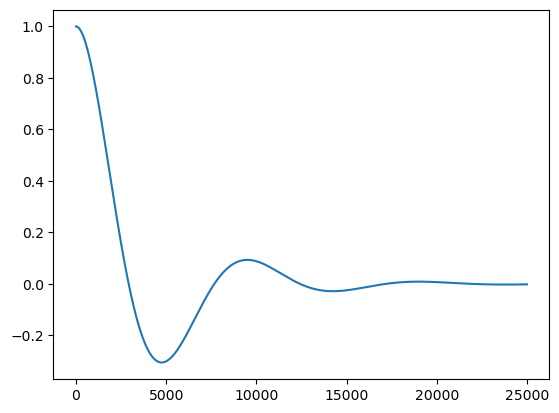

In [6]:
plt.plot(out)
print(end-start)